In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Activation, Conv2D, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train[0].shape

(28, 28)

8


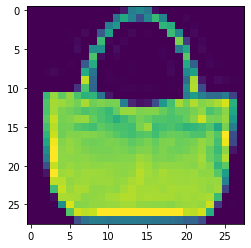

In [4]:
print(y_train[100])
plt.imshow(X_train[100])
plt.show()

In [5]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

8


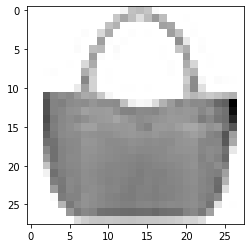

In [6]:
print(y_train[100])
plt.imshow(X_train[100], cmap=plt.cm.binary)
plt.show()

In [7]:
X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)

In [8]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train_one_hot, batch_size=64, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 146s 2ms/sample - loss: 0.5128 - accuracy: 0.8132
Epoch 2/5
60000/60000 [==============================] - 145s 2ms/sample - loss: 0.3430 - accuracy: 0.8744
Epoch 3/5
60000/60000 [==============================] - 146s 2ms/sample - loss: 0.3023 - accuracy: 0.8891
Epoch 4/5
60000/60000 [==============================] - 147s 2ms/sample - loss: 0.2760 - accuracy: 0.8995
Epoch 5/5
60000/60000 [==============================] - 145s 2ms/sample - loss: 0.2558 - accuracy: 0.9043


In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss 0.29689686688184735
Test accuracy 0.8925


In [12]:
predictions = model.predict(X_test)
print(np.argmax(np.round(predictions[0])))

9


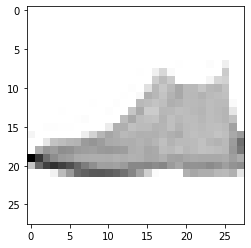

In [13]:
plt.imshow(X_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()